In [1]:
import tensorflow as tf
# Load the TFRecord file
path = r"C:\Users\Naman Rajput\Desktop\Exodec\pre-processing\TFRecords\train\toi-train.tfRecords"
# Load the dataset
raw_dataset = tf.data.TFRecordDataset(path)


for raw_record in raw_dataset.take(1):
    example = tf.train.Example()
    example.ParseFromString(raw_record.numpy())
    print(example)



features {
  feature {
    key: "Depth"
    value {
      float_list {
        value: 0.9992081
      }
    }
  }
  feature {
    key: "DepthEven"
    value {
      float_list {
        value: 0.99934494
      }
    }
  }
  feature {
    key: "DepthOdd"
    value {
      float_list {
        value: 0.9992562
      }
    }
  }
  feature {
    key: "Disposition"
    value {
      bytes_list {
        value: "PC"
      }
    }
  }
  feature {
    key: "Duration"
    value {
      float_list {
        value: 1.7644728
      }
    }
  }
  feature {
    key: "Mass"
    value {
      float_list {
        value: -0.2942787
      }
    }
  }
  feature {
    key: "NumTransits"
    value {
      float_list {
        value: 4.0
      }
    }
  }
  feature {
    key: "Period"
    value {
      float_list {
        value: 5.81001
      }
    }
  }
  feature {
    key: "Radius"
    value {
      float_list {
        value: -0.377799
      }
    }
  }
  feature {
    key: "T0"
    value {
      float_

In [2]:
feature_description = {
    'Depth': tf.io.VarLenFeature( tf.float32),
    'DepthEven': tf.io.VarLenFeature( tf.float32),
    'flux': tf.io.VarLenFeature( tf.float32), 
    'DepthOdd':tf.io.VarLenFeature( tf.float32),
    'Duration':tf.io.VarLenFeature( tf.float32),
    'Disposition':tf.io.FixedLenFeature([], tf.string),
    'Mass': tf.io.FixedLenFeature([], tf.float32),
    'NumTransits': tf.io.FixedLenFeature([], tf.float32),
    'Period': tf.io.FixedLenFeature([], tf.float32),
    'Radius': tf.io.FixedLenFeature([], tf.float32),
    'T0': tf.io.FixedLenFeature([], tf.float32),
    'TIC_ID': tf.io.FixedLenFeature([], tf.int64),
    'TMag': tf.io.FixedLenFeature([], tf.float32),
    'Teff': tf.io.FixedLenFeature([], tf.float32),
    'a': tf.io.FixedLenFeature([], tf.float32),
    'b': tf.io.FixedLenFeature([], tf.float32),
    'distance': tf.io.FixedLenFeature([], tf.float32),
    'global view': tf.io.VarLenFeature( tf.float32),
    'local view': tf.io.VarLenFeature( tf.float32),
    'odd_even view': tf.io.VarLenFeature( tf.float32),
    'logg': tf.io.FixedLenFeature([], tf.float32),
    'lum': tf.io.FixedLenFeature([], tf.float32),
    'shifted global view': tf.io.VarLenFeature(tf.float32),
      'rho': tf.io.FixedLenFeature([], tf.float32),
    'rp_rs': tf.io.FixedLenFeature([], tf.float32),
    'sde': tf.io.FixedLenFeature([], tf.float32),
    'snr': tf.io.FixedLenFeature([], tf.float32),
    'tdur': tf.io.FixedLenFeature([], tf.float32),
}


# Parsing function
def parse_tfrecord(example_proto):
    return tf.io.parse_single_example(example_proto, feature_description)

# Load and parse the dataset
parsed_dataset = raw_dataset.map(parse_tfrecord)

# Iterate through parsed records
for parsed_record in parsed_dataset.take(1):
    print("TIC_ID:", parsed_record['TIC_ID'].numpy())
    print("Disposition:", parsed_record['Disposition'].numpy())
    print("Mass:", parsed_record['Mass'].numpy())
    print("Radius:", parsed_record['Radius'].numpy())
    print("Period:", parsed_record['Period'].numpy())
    print("T0:", parsed_record['T0'].numpy())
    print("TMag:", parsed_record['TMag'].numpy())
    print("Teff:", parsed_record['Teff'].numpy())
    print("logg:", parsed_record['logg'].numpy())
    print("lum:", parsed_record['lum'].numpy())
    print("a:", parsed_record['a'].numpy())
    print("b:", parsed_record['b'].numpy())
    print("distance:", parsed_record['distance'].numpy())
    print("rho:", parsed_record['rho'].numpy())
    print("rp_rs:", parsed_record['rp_rs'].numpy())
    print("sde:", parsed_record['sde'].numpy())
    print("snr:", parsed_record['snr'].numpy())
    print("tdur:", parsed_record['tdur'].numpy())
     # Convert sparse tensors to dense
    global_view = tf.sparse.to_dense(parsed_record['global view']).numpy()
    local_view = tf.sparse.to_dense(parsed_record['local view']).numpy()
    odd_even_view = tf.sparse.to_dense(parsed_record['odd_even view']).numpy()  
    shifted_global_view = tf.sparse.to_dense(parsed_record['shifted global view']).numpy()

    # Print  values
    print("Global View :", global_view[:])
    print("Local View :", local_view[:])
    print("Odd-Even View :", odd_even_view[:])
    print("Shifted Global View :", shifted_global_view[:])







TIC_ID: 468880077
Disposition: b'PC'
Mass: -0.2942787
Radius: -0.377799
Period: 5.81001
T0: 1441.0513
TMag: 9.401
Teff: -0.18076321
logg: -1.0713683
lum: -0.05991275
a: 0.4136
b: 0.1999
distance: -0.35978684
rho: 0.09908084
rp_rs: 0.025619281
sde: 17.759007
snr: 12.877367
tdur: 0.14101714
Global View : [ 0.63075316  1.0470506   1.0200299   1.0494673   0.74774617  0.929476
  1.0253893   0.96097773  1.0129591   0.852782    1.0948038   0.5695588
  1.2176927   1.1231401   1.0095798   0.99852794  0.9293226   1.1198446
  0.96466696  0.48543566  0.93109244  0.644395    1.1524934   1.0913626
  0.8330185   1.0210646   0.85332644  1.1746343   0.7740557   1.1907164
  0.9263851   0.936966    1.3139843   1.0429934   0.935508    0.63418764
  0.8277076   1.0562494   0.9359384   0.7986839   1.1507518   0.8488681
  1.0940694   1.0678936   1.2221828   1.1403129   0.9988222   0.92243445
  1.1647382   0.812081    1.0995551   0.96546686  0.9740051   0.9495135
  0.9702455   1.0176643   1.0401422   1.1960068

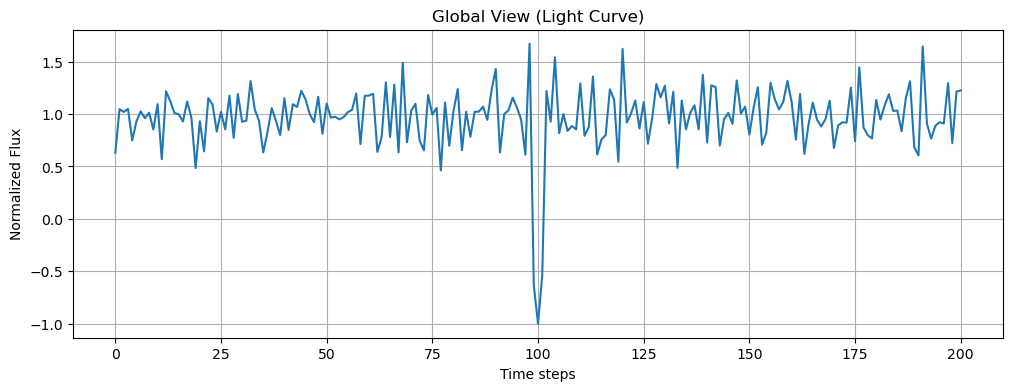

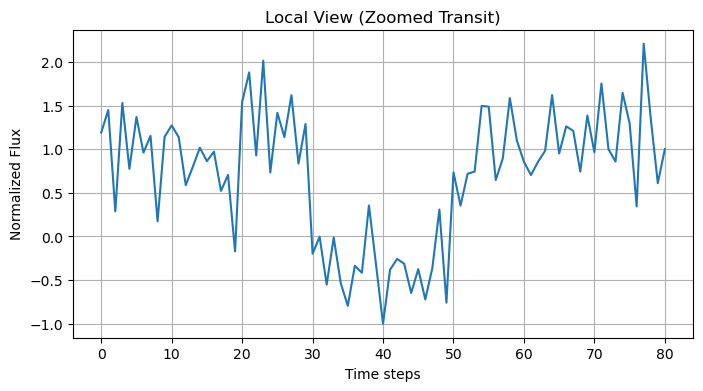

In [3]:


import matplotlib.pyplot as plt

# Example: global_view is 2001 points
plt.figure(figsize=(12, 4))
plt.plot(global_view)
plt.title("Global View (Light Curve)")
plt.xlabel("Time steps")
plt.ylabel("Normalized Flux")
plt.grid(True)
plt.show()

# Example: local_view is 201 points
plt.figure(figsize=(8, 4))
plt.plot(local_view)
plt.title("Local View (Zoomed Transit)")
plt.xlabel("Time steps")
plt.ylabel("Normalized Flux")
plt.grid(True)
plt.show()



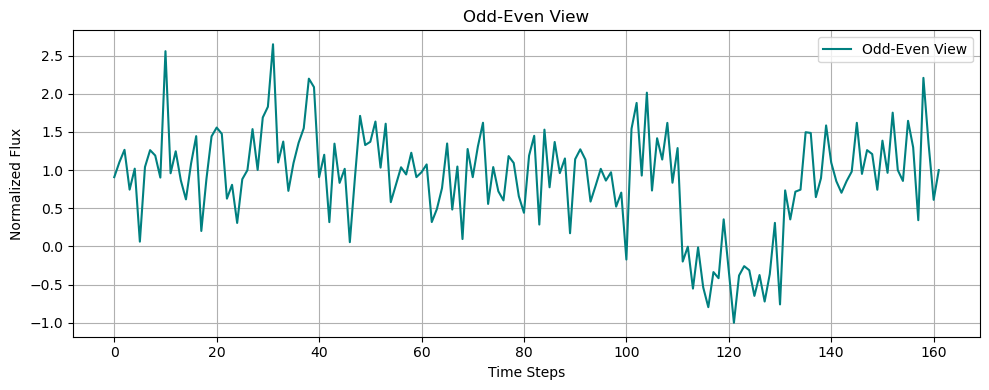

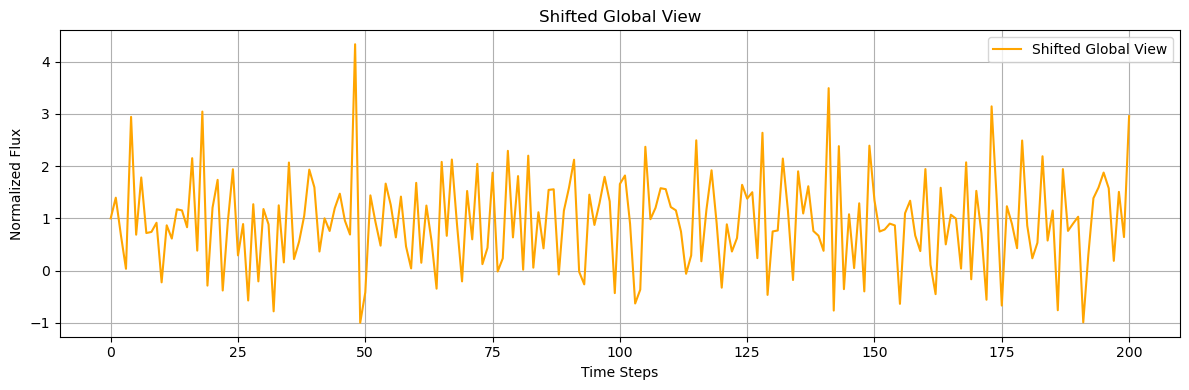

In [4]:
# Plot odd_even view
plt.figure(figsize=(10, 4))
plt.plot(odd_even_view, label="Odd-Even View", color='teal')
plt.title("Odd-Even View")
plt.xlabel("Time Steps")
plt.ylabel("Normalized Flux")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plot shifted global view
plt.figure(figsize=(12, 4))
plt.plot(shifted_global_view, label="Shifted Global View", color='orange')
plt.title("Shifted Global View")
plt.xlabel("Time Steps")
plt.ylabel("Normalized Flux")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
